# NIR-Red-Green

Create a false-color a [PlanetScope 4-band image](https://developers.planet.com/docs/data/psscene4band/) (PSScene4Band)

A Planet API key is required

In [1]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imsave

import sys
sys.path.append('../')

# FIXME: Remove this block after module code has been completed
%load_ext autoreload
%autoreload 1
%aimport rstools.main

from rstools.main import midpoint_normalize, show_ndvi_fig, show_ndvi_hist, get_reflectance_coeffs, bands_to_display, get_bands

## Specify input data and output folders

In [2]:
DATA_LOC = '../data/'
OUTPUT_LOC = '../output/'

## Band Order for PlanetScope 4-band images (PSScene4Band)

In [3]:
ANALYTIC_BAND_NUMS=dict(BLUE = 1, GREEN = 2, RED = 3, NIR = 4)

## Specify Planet item id for PSScene4Band image

In [4]:
#PLANET_ITEM_ID = '20160831_180302_0e26' #reflectance coeffs 2.55957020415e-05 3.87396124832e-05
                                        #range NDVI (-0.999551583679821, 0.9998732042084099)

#PLANET_ITEM_ID = '20210217_173811_1026'#reflectance coeffs (3.09419250778e-05, 4.68637435774e-05)
                                        #range NDVI (-0.6696521855564906, 0.5279276908614214)

# SANTA FE OPEN SPACE 2020-07-04
#PLANET_ITEM_ID = '20200704_173510_95_1062'#reflectance coeffs (2.36459796684e-05, 3.68854257857e-05)
                                        #range NDVI (-0.11468907042978817, 0.6800783024111237)
    
# Rice Terrace Clusters of Mayoyao: Mayoyao Central
#PLANET_ITEM_ID = '20210202_020545_101f'
#PLANET_ITEM_ID = '20201119_024057_71_1066'
PLANET_ITEM_ID = '20200601_024315_01_1065' #Superdove
    
# TEST DATA FROM ORIGINAL NOTEBOOK
#PLANET_ITEM_ID = '20210217_173809_1026' #reflectance coeffs 3.10115984374e-05 4.696926883e-05
                                        #range NDVI (-0.6923316699660859, 0.6292593054291127)

    

## Download image and metadata from Planet

In [5]:
!planet data download --item-type PSScene4Band --dest $DATA_LOC --asset-type analytic_sr --string-in id $PLANET_ITEM_ID

activating: 0            complete: 0              elapsed: 0                    
paging: False            pending: 0                                             

activating: 1            complete: 0              downloaded: 0.00MB            
downloading: 0           elapsed: 1               paging: True                  
pending: 0                                                                      

activating: 0            complete: 0              downloaded: 0.00MB            
downloading: 1           elapsed: 2               paging: False                 
pending: 0                                                                      

activating: 0            complete: 0              downloaded: 0.00MB            
downloading: 1           elapsed: 3               paging: False                 
pending: 0                                                                      

{"item": "20200601_024315_01_1065", "asset": "analytic_sr", "location": "/home/jovyan/work/data/20200601_

## Specify input and output files

In [6]:
# Input
filename_img = DATA_LOC + PLANET_ITEM_ID + '_3B_AnalyticMS_SR.tif'

# Output
imagetype = 'nir-red-green'
filename_out = OUTPUT_LOC + PLANET_ITEM_ID + '_' + imagetype + '.png'

## Read the bands

In [7]:
bands, metadata = get_bands(filename_img, ANALYTIC_BAND_NUMS)

## Save a NIR RED GREEN PNG file

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


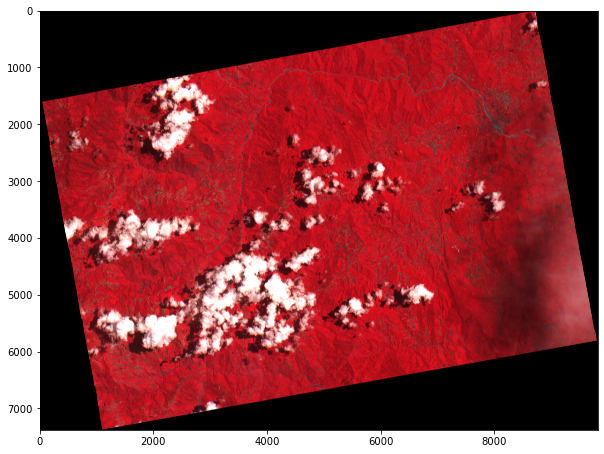

In [8]:
fig = plt.figure(figsize=(10, 10))
norm_bands = bands_to_display([bands['NIR'], bands['RED'], bands['GREEN']], alpha=False)
imsave(filename_out, norm_bands, check_contrast=False)

plt.imshow(norm_bands)